# 图像增广

In [8]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt

2个好处：1）扩大样本数；2）避免网络过拟合于训练集图像中一些固有的属性，比如目标位置、图像颜色等。

图像增广在对训练图像进行一系列的随机变化之后，生成相似但不同的训练样本，从而扩大了训练集的规模。 

此外，应用图像增广的原因是，随机改变训练样本可以减少模型对某些属性的依赖，从而提高模型的泛化能力。 例如，我们可以以不同的方式裁剪图像，使感兴趣的对象出现在不同的位置，减少模型对于对象出现位置的依赖。 我们还可以调整亮度、颜色等因素来降低模型对颜色的敏感度。 

# 使用PIL来读取图片

In [22]:
# 先定义一个显示多张图片的函数
def show_images(imgs, cols, rows):
    figure = plt.figure(figsize=(8, 8))
    for i in range(cols * rows):
        figure.add_subplot(rows, cols, i + 1)
        # plt.title(labels_map[label])
        plt.axis("off")  # 不显示x,y坐标轴上的刻度
        plt.imshow(imgs[i])
    plt.show()

In [32]:
im = Image.open('./images/cat.jpg')
print(f'Image: format = {im.format}, mode = {im.mode}, size = {im.size}')

Image: format = JPEG, mode = RGB, size = (1020, 575)


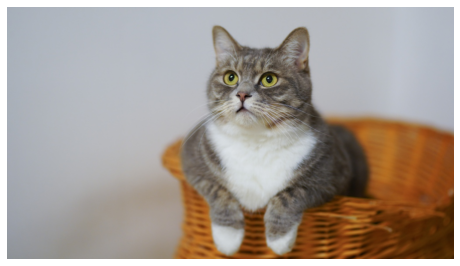

In [33]:
show_images([im], 1, 1)

# 常见的图像增广的方法

## 翻转

翻转变化以p的概率对图像进行水平或竖直翻转

- 水平翻转：torchvision.transforms.RandomHorizontalFlip(p=0.5)
- 竖直翻转：torchvision.transforms.RandomVerticalFlip(p=0.5)，竖直翻转一般用的不多

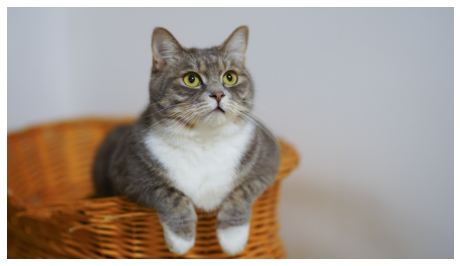

In [40]:
flip_transform = torchvision.transforms.RandomHorizontalFlip(p=0.9)
flip_img = flip_transform(im)
show_images([flip_img], 1, 1)

## 随机裁剪

随机裁剪的好处，是可以让目标的位置发生变化，不至于让网络对于目标位置太敏感。

`torchvision.transforms.RandomResizedCrop`随机裁剪的控制参数：

- size 用于指定随机裁剪后，统一resize的大小
- scale用于指定随机裁剪的区域的面积相比于原图的面积比
- ratio用于指定裁剪区域的高宽比范围

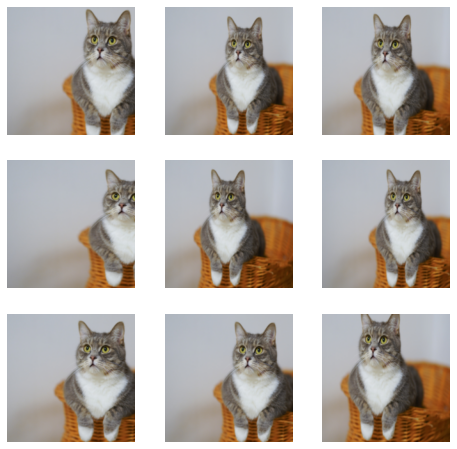

In [50]:
tansform = torchvision.transforms.RandomResizedCrop((200,200), scale=(0.5, 1), ratio=(0.6, 1.5))
rows = 3
cols = 3
rand_crop_imgs = []
for i in range(rows * cols):
    rand_crop_imgs.append(tansform(im))
show_images(rand_crop_imgs, cols, rows)

## 改变颜色

我们可以利用`torchvision.transforms.ColorJitter`变换来改变图像的颜色，可以通过以下4个方面来控制
- 亮度(brightness)
- 对比度(contrast)
- 饱和度(saturation)
- 色调(hue)
每一种参数我们都可以设置一个`(min,max)`或者指定一个比例value，那么整个变换的范围就是`(1-value)~(1+value)`之间。对于hue就是`-value~+value`。

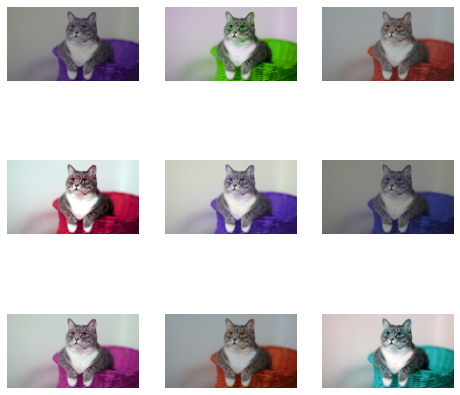

In [52]:
tansform = torchvision.transforms.ColorJitter(brightness=0.3, contrast=0.2, saturation=0.2, hue=0.5)
rows = 3
cols = 3
rand_crop_imgs = []
for i in range(rows * cols):
    rand_crop_imgs.append(tansform(im))
show_images(rand_crop_imgs, cols, rows)

# 多种Transofrom的组合

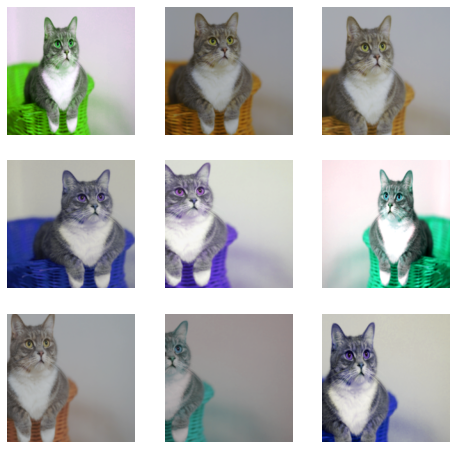

In [53]:
transfroms = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(p=0.9),
    torchvision.transforms.RandomResizedCrop((200,200), scale=(0.5, 1), ratio=(0.6, 1.5)),
    torchvision.transforms.ColorJitter(brightness=0.3, contrast=0.2, saturation=0.2, hue=0.5)
])
rows = 3
cols = 3
rand_crop_imgs = []
for i in range(rows * cols):
    rand_crop_imgs.append(transfroms(im))
show_images(rand_crop_imgs, cols, rows)

# ToTensor

在经过多次图像增广后，图像最终是需要进神经网络来训练的，所以需要从PIL的Image格式转化为torch.Tensor格式。

(H x W x C) in range `[0,255]` to (C x H x W) in the range `[0, 1.0]`

# Normalize 

`torchvision.transforms.Normalize`用于对输入的tensor image进行归一化，它的参数是均值和标准差，按输入的tensor的channel，每个channel一个值。

参数：
- mean 对于每个channel的均值序列
- std： 对于每个channel的标准差序列

In [60]:
normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=(0.229, 0.224, .225))
img = torch.randn(1, 3, 32, 32)
img_normalized = normalize(img)